In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/2n UNI/3r Trimestre/Processament Imatges/Labs/Lab5/'
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter

# Texture synthesis

The goal of this fifth lab is to perform cool stuff with Fourier and textures! In particular, we might want to: (a) generate random images given a texture, (b) generate images given a random-noise texture or even (c) merge textures.
Since the lab is quite simple and you can complete it by going through the pdf straightforward, this mlx file will just provide you with the basic functions/warnings that you will need from now on!
For a couple of given images:

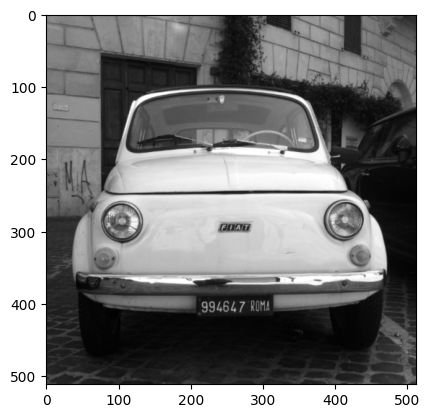

In [ ]:
#Read the image in Double
roma = mpimg.imread(path+"roma.png")
plt.imshow(roma, cmap="gray")

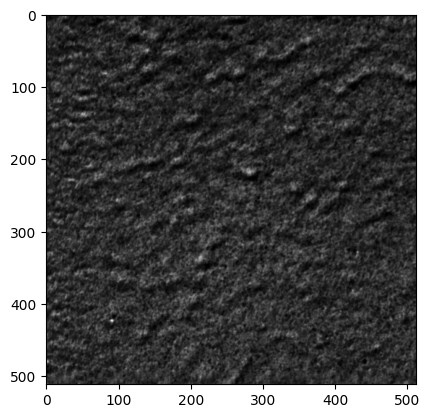

In [ ]:
#Read the image in Double
texture = mpimg.imread(path+"texture.png")
plt.imshow(texture, cmap="gray")

In [ ]:
from scipy.fft import fft2, ifft2, fftshift, fft, ifft
import cmath
import numpy as np
freqCar = fft2(roma)
freqTexture = fft2(texture)

As you have previously seen in Lab2, computing the discrete Fourier transform of these images can be performed by using the "fft2" built-in function:

Both matrices are then transformed into the frequency domain, thus obtaining complex doubles in the given variables (meaning that every pixel has a real and a complex part). For instance, the first 10 pixels of the first row....

In [ ]:
freqCar[0,:10]

array([104587.18     -0.j     , -13345.629  +475.36853j,
        -5876.286 -4268.8525j ,   4680.991 -4139.413j  ,
        -1337.4966-1521.7087j ,  -1932.3071-2484.136j  ,
        -2863.579 -1456.3649j ,   1145.6421 -974.3979j ,
         1630.2046 +193.31438j,   2072.2458 -510.49588j], dtype=complex64)

**Note:** The inverse procedure would be applying the "ifft2" function to go back to the original domain. In case you still have some complex numbers after performing the inverse Fourier Transform, you can suppress them by using the "real" function.
Then, some Fourier-related functions that will be required in order to complete the lab are:
Getting the **modulus** of the Discrete Fourier Transform

In [ ]:
modCar = abs(freqCar) #Get the mangitude
modCar

array([[104587.18   ,  13354.093  ,   7263.184  , ...,   6248.7134 ,
          7263.184  ,  13354.093  ],
       [ 26726.377  ,  12600.95   ,   1018.1139 , ...,   5304.7236 ,
          9967.794  ,  15796.998  ],
       [ 18820.488  ,   2253.3562 ,   3764.0552 , ...,   1951.8873 ,
          5922.9194 ,   5957.8555 ],
       ...,
       [ 10554.657  ,   3313.6692 ,   3950.6233 , ...,   2530.8435 ,
          3377.4158 ,   1542.5629 ],
       [ 18820.488  ,   5957.8555 ,   5922.9194 , ...,    479.53772,
          3764.0552 ,   2253.3562 ],
       [ 26726.377  ,  15796.998  ,   9967.794  , ...,   1435.5559 ,
          1018.1139 ,  12600.95   ]], dtype=float32)

Getting the **phase** of the Discrete Fourier Transform

In [ ]:
phaseCar = np.angle(freqCar); # Get the phase
phaseCar

array([[-0.        ,  3.105988  , -2.513332  , ...,  0.72407454,
         2.513332  , -3.105988  ],
       [-3.001179  , -0.04867012, -1.7863854 , ..., -0.85167915,
        -0.73245424, -0.16552807],
       [-1.0439165 , -2.2542033 ,  1.7200602 , ...,  1.2527457 ,
         2.369032  ,  2.9491212 ],
       ...,
       [ 0.9278981 , -2.0720854 , -1.6522787 , ...,  2.474586  ,
        -2.1012444 , -2.1866002 ],
       [ 1.0439165 , -2.9491212 , -2.369032  , ..., -1.4450388 ,
        -1.7200602 ,  2.2542033 ],
       [ 3.001179  ,  0.16552807,  0.73245424, ...,  2.1498237 ,
         1.7863854 ,  0.04867012]], dtype=float32)

Besides, for the 2nd exercise, you might need some kind of function to create a random texture of a White Gaussian Noise (WGN) signal. For this reason you might use the "randn" function; for example, in order to get a (5,5) matrix of WGN we might use:

In [ ]:
wgn5b5 = np.random.randn(5,5) # Create White Gaussian Noise
wgn5b5


array([[ 1.62852963, -0.82459966,  0.88404107, -1.68221672,  0.01780905],
       [-0.52979324,  0.68401016, -1.2679284 ,  0.32006915,  0.33395958],
       [-0.13943398, -0.02412438, -1.32312524,  0.30714293,  1.11862536],
       [-0.08866435,  0.73550636, -2.96607574,  0.27909825,  1.07455757],
       [ 0.82750698, -1.30008457, -0.27881995,  0.54700908, -0.15021313]])

Then, the Fast Fourier Transform can also be applied to this random phase:

In [ ]:
frecWgn5b5 = fft2(wgn5b5)
frecWgn5b5

array([[-1.81721421-0.j        ,  6.40415602+5.74724576j,
        -1.25018634-2.65559126j, -1.25018634+2.65559126j,
         6.40415602-5.74724576j],
       [ 0.60238615-0.43180923j, -1.75891885-2.90804154j,
         4.83366378+8.3517629j ,  5.52854176-2.48485818j,
         0.31964549+4.07650032j],
       [ 0.3651294 +0.92215042j,  2.18059539-2.92249913j,
        -2.32379449+6.43480128j,  3.3847108 -0.063227j  ,
         2.97929839-0.62364426j],
       [ 0.3651294 -0.92215042j,  2.97929839+0.62364426j,
         3.3847108 +0.063227j  , -2.32379449-6.43480128j,
         2.18059539+2.92249913j],
       [ 0.60238615+0.43180923j,  0.31964549-4.07650032j,
         5.52854176+2.48485818j,  4.83366378-8.3517629j ,
        -1.75891885+2.90804154j]])

**Important:** for the RPN exercise, once you computed the fft2 of the random phase, in order to obtain an appropriate result, some **normalization** must be applied. If you take a closer look, you are gonna see that the (0,0) pixel of the matrix never has imaginary part; therefore, this first position's value will always be , being  a random number.

In [ ]:
frecWgn5b5[0,0]

(-1.8172142066747379-0j)

In order to make the 2nd exercise work smoothly, the value of this first pixel must be 1 + 0.i ; as you might expect, it is not enough to change it manually. Instead, you should normalize all the matrix in a way that the (1,1) pixel has the desired value... No more hints at the moment!


In [ ]:
# Functions lab 2:
def show_image(img, title):
  imgplot = plt.imshow(img, cmap='gray')
  plt.title(title)
  plt.show()

def normalize(X):
  return (X - X.min()) / (X.max() - X.min())

def discreteFourier(image):       # ???   NOOOOOOOOOOOOO usar

  image_fourier_real = np.abs(image.real)
  image_fourier_real_log = np.log(1 + (image_fourier_real))
  image_fourier_real_log_normal = normalize(image_fourier_real_log)

  return image_fourier_real_log_normal

# Exercise 1

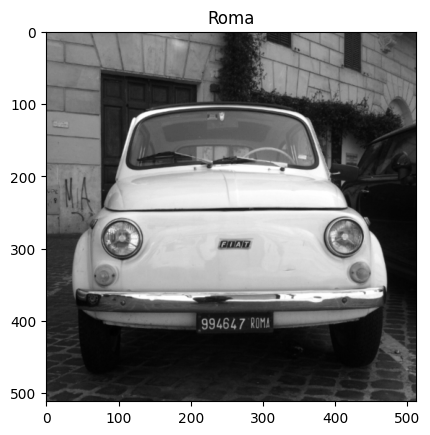

In [ ]:
u1 = np.array(Image.open(path+"roma.png"))
show_image(u1,"Roma")

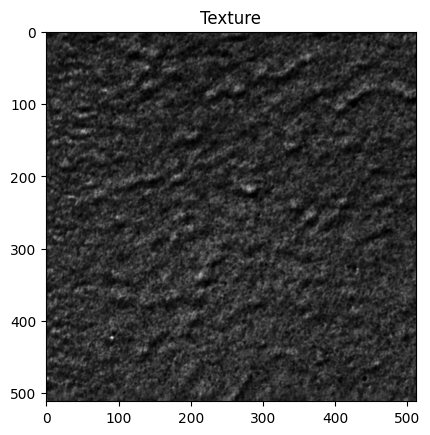

In [ ]:
u2 = np.array(Image.open(path+"texture.png"))
show_image(u2, "Texture")

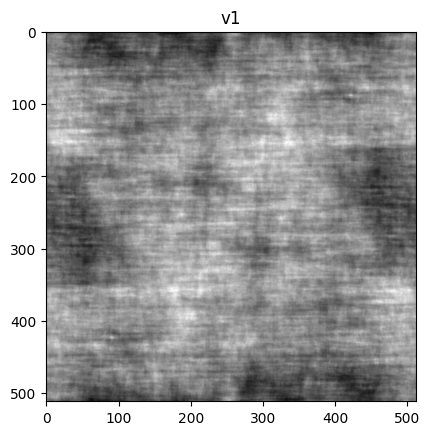

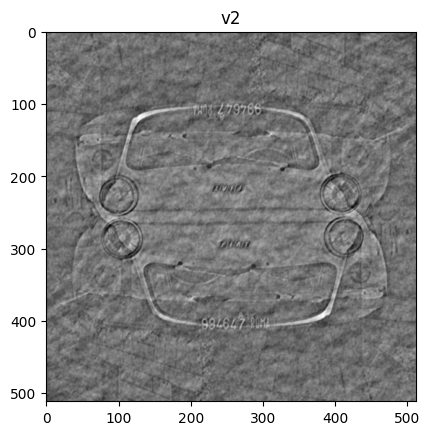

In [ ]:
# v1_fourier = modul(u1_fourier) * e ^ i*arg(u2_fourier)
# v2_fourier = modul(u2_fourier) * e ^ i*arg(u1_fourier)

v1_fourier = np.abs(fft2(u1)) * np.exp(1j * np.angle(fft2(u2))).real
v2_fourier = np.abs(fft2(u2)) * np.exp(1j * np.angle(fft2(u1))).real

v1 = ifft2(v1_fourier)
show_image(v1.real, "v1")

v2 = ifft2(v2_fourier)
show_image(v2.real, "v2")

In [ ]:
# NO se si han de sortir ses imatges així

# Exercise 2

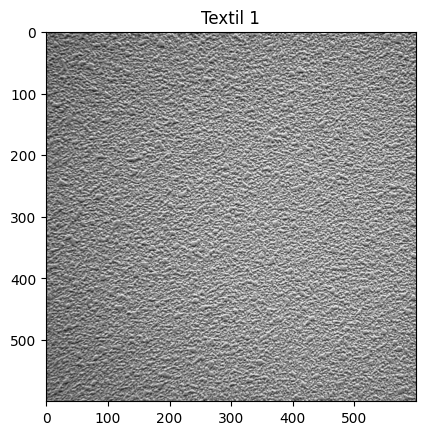

In [ ]:
img1 = np.array(Image.open(path+"textil-1-gray.png"))
show_image(img1,"Textil 1")

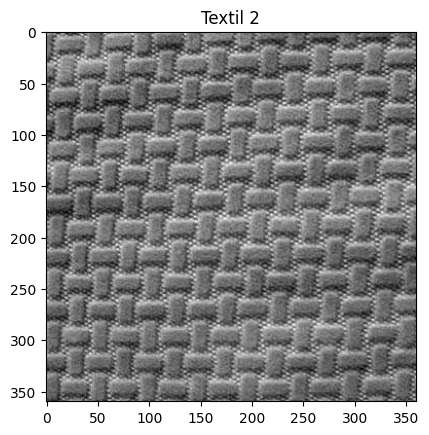

In [ ]:
img2 = np.array(Image.open(path+"textil-2-gray.png"))
show_image(img2,"Textil 2")

In [ ]:
def synthesize(image):
  freq_Img = fft2(image)
  mod_Img = np.abs(freq_Img)

  WGN = np.random.randn(image.shape[0], image.shape[1])

  freq_WGN = fft2(WGN)

  random_phase = np.exp(1j * np.angle(freq_WGN))
  random_phase[0, 0] = 1 + 0j

  DFT_Img = mod_Img * random_phase

  synthesized = normalize(ifft2(DFT_Img).real)

  return synthesized

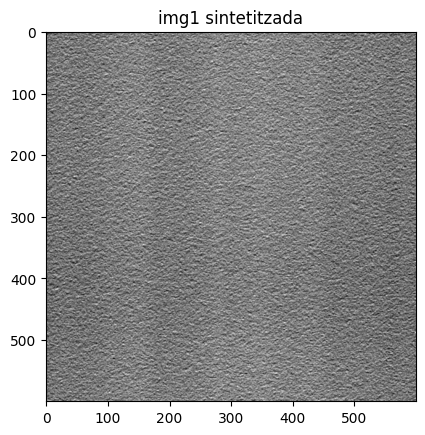

In [ ]:
img1_synthesized = synthesize(img1)
show_image(img1_synthesized, "img1 sintetitzada")

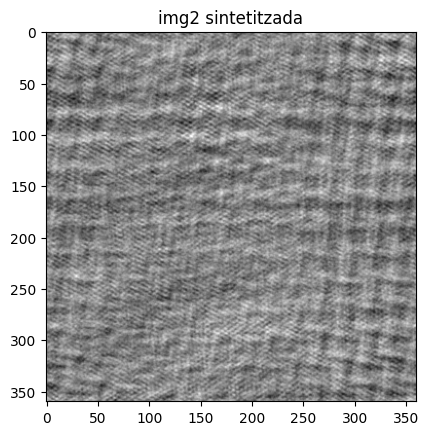

In [ ]:
img2_synthesized = synthesize(img2)
show_image(img2_synthesized, "img2 sintetitzada")

In [ ]:
def synthesize_RGB(image):
  canal_R = image[:, :, 0]
  canal_G = image[:, :, 1]
  canal_B = image[:, :, 2]

  freq_R = fft2(canal_R)
  freq_G = fft2(canal_G)
  freq_B = fft2(canal_B)

  mod_R = np.abs(freq_R)
  mod_G = np.abs(freq_G)
  mod_B = np.abs(freq_B)

  WGN = np.random.randn(canal_R.shape[0], canal_R.shape[1])
  freq_WGN = fft2(WGN)

  random_phase = np.exp(1j * np.angle(freq_WGN))
  random_phase[0, 0] = 1 + 0j

  DFT_R = mod_R * random_phase
  DFT_G = mod_G * random_phase
  DFT_B = mod_B * random_phase

  synthesized_R = ifft2(DFT_R).real
  synthesized_G = ifft2(DFT_G).real
  synthesized_B = ifft2(DFT_B).real

  synthesized_image = normalize(np.stack((synthesized_R, synthesized_G, synthesized_B), axis = -1))

  return synthesized_image


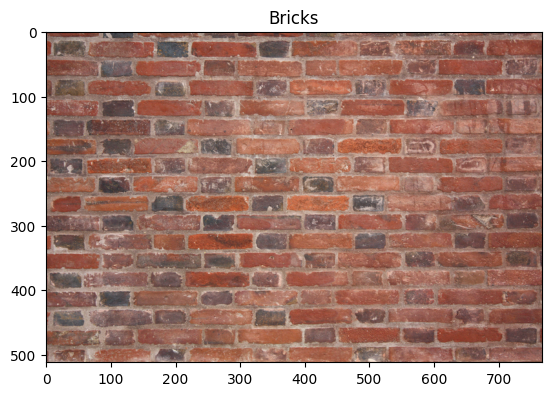

In [ ]:
bricks = np.array(Image.open(path+"bricks.png"))
show_image(bricks,"Bricks")

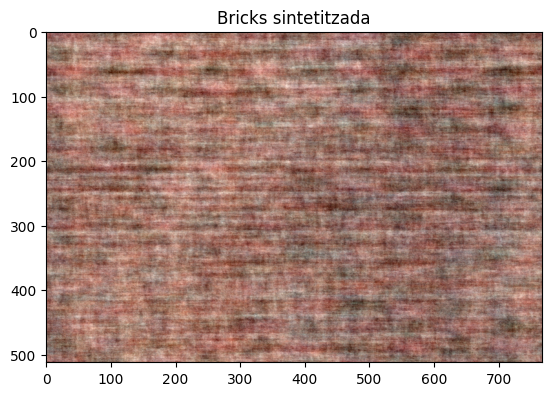

In [ ]:
bricks_synthesized = synthesize_RGB(bricks)
show_image(bricks_synthesized, "Bricks sintetitzada")